# Info
: 기사에 사용된 단어들을 이용해 단어들의 경향성을 찾아내기 위한 코드3.2(강남구만)

In [87]:
import pandas as pd
import glob

file_name = glob.glob('../article/headline_noun_keyword*')

keyword_df = []
for file in file_name:
    df = pd.read_pickle(file)
    keyword_df.append(df)

keyword_all = pd.concat(keyword_df, ignore_index = True)
keyword = keyword_all[keyword_all['week'] <= 807]
keyword

,date,co,headline,week,pos
0,2006.01.01. 오후 11:23,매일경제,취득세ㆍ등록세 0.5%P씩 인하,0,"[취득세, 인하]"
1,2006.01.01. 오후 11:23,매일경제,양도세 부담 덜자 하반기 매물 늘듯,0,"[양도세, 부담, 하반기, 매물]"
2,2006.01.01. 오후 11:23,매일경제,서울 대치동 57평형 보유세 651만원,0,"[서울, 대치동, 평, 보유, 세, 만, 원]"
3,2006.01.01. 오후 11:23,매일경제,양도세 줄이는 방법 필요경비 증빙서류 꼭 챙기자,0,"[양도세, 방법, 필요, 경비, 증빙, 서류]"
4,2006.01.01. 오후 11:23,매일경제,올해 실거래가 신고제 폭풍 이중계약서 관행 사라진다,0,"[올해, 실, 거래, 신고, 폭풍, 이중, 계약서, 관행]"
...,...,...,...,...,...
1065646,2021.06.26. 오전 5:00,뉴시스,비상 걸린 전세⑥전문가들 꼬일 대로 꼬였다…규제라도 풀어야,807,"[비상, 전세, 전문가, 대로, 규제]"
1065647,2021.06.26. 오전 3:04,세계일보,‘래미안 원베일리’ 청약에 만점 통장 등장… 올해 두 번째,807,"[래미안, 원, 베일리, 청약, 만점, 통장, 등장, 올해, 번]"
1065648,2021.06.26. 오전 3:01,동아일보,‘10억 로또 청약’ 원베일리… 7인 가족 만점통장 나왔다,807,"[억, 로또, 청약, 원, 베일리, 인, 가족, 만점, 통장]"
1065649,2021.06.26. 오전 3:01,동아일보,故 이건희 회장 이태원 주택 210억에 매물로,807,"[이건희, 회장, 이태원, 주택, 억, 매물]"


In [88]:
up_keyword = ['상승', '상승세', '오름세', '급등', '폭']
down_keyword = ['하락', '하락세', '약세', '보합', '급락']

In [89]:
weekly_keyword = keyword.groupby(['week']).sum()['pos']
count = keyword.groupby(['week']).count()['pos']

In [90]:
import pos_to_dict

word_df =  pos_to_dict.pos_to_dict(keyword)

In [94]:
up_word_df = word_df.loc[up_keyword,:]
up_word_df = up_word_df.transpose()

total_list = []

for i in range(len(up_word_df)):
    total = 0
    for j in up_word_df.iloc[i]:
        total += j
    total_list.append(total)
up_word_df['total'] = total_list
up_word_df = up_word_df.transpose()

In [95]:
down_word_df = word_df.loc[down_keyword,:]
down_word_df = down_word_df.transpose()

total_list = []

for i in range(len(down_word_df)):
    total = 0
    for j in down_word_df.iloc[i]:
        total += j
    total_list.append(total)
down_word_df['total'] = total_list
down_word_df = down_word_df.transpose()

In [96]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

many = len(gu_name)

In [97]:
gu_data = []

for gu in gu_name:
    df = pd.read_pickle(f'../seoul_apt_trade_data/{gu}_trade.pkl')
    df = df[df['거래주'] <= 807]
    df = df.groupby(['거래주']).mean(['면적당가격'])
    for i in range(1,808):
        try:
            if df['면적당가격'][i]:
                continue
        except:
            df.loc[i] = df.loc[i-1]
    gu_data.append(df)

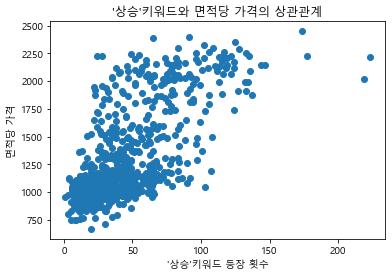

SpearmanrResult(correlation=0.655325032324232, pvalue=2.6155283740461287e-100)
(0.6964470029422347, 2.8212021854344743e-118)


In [98]:
import matplotlib.pyplot as plt
import scipy.stats

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.scatter(up_word_df.loc['total'],gu_data[0]['면적당가격'])
plt.title("'상승'키워드와 면적당 가격의 상관관계")
plt.xlabel("'상승'키워드 등장 횟수")
plt.ylabel("면적당 가격")
plt.show()
print(scipy.stats.spearmanr(up_word_df.loc['total'],gu_data[0]['면적당가격']))
print(scipy.stats.pearsonr(up_word_df.loc['total'],gu_data[0]['면적당가격']))

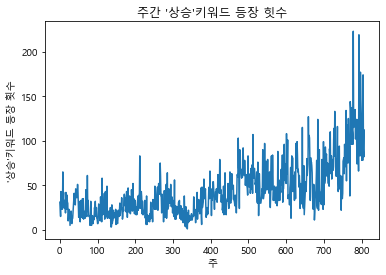

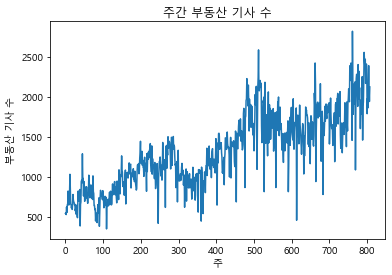

In [99]:
plt.plot(up_word_df.loc['total'])
plt.title("주간 '상승'키워드 등장 힛수")
plt.xlabel("주")
plt.ylabel("'상승'키워드 등장 횟수")
plt.show()
plt.plot(count)
plt.title("주간 부동산 기사 수")
plt.xlabel("주")
plt.ylabel("부동산 기사 수")
plt.show()

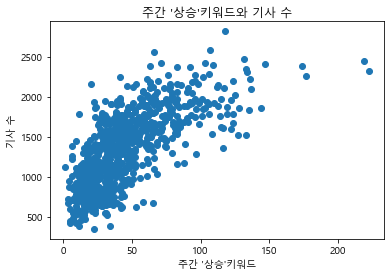

SpearmanrResult(correlation=0.730168730527312, pvalue=1.8389991833140675e-135)
(0.7102754272231186, 5.039572557537827e-125)


In [100]:
plt.scatter(up_word_df.loc['total'],count)
plt.title("주간 '상승'키워드와 기사 수")
plt.xlabel("주간 '상승'키워드")
plt.ylabel("기사 수")
plt.show()
print(scipy.stats.spearmanr(up_word_df.loc['total'],count))
print(scipy.stats.pearsonr(up_word_df.loc['total'],count))

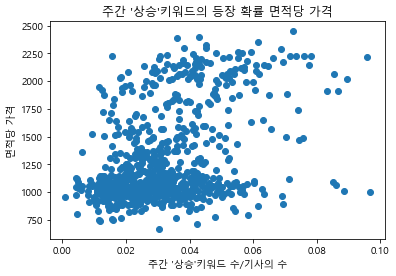

SpearmanrResult(correlation=0.3442514492976788, pvalue=6.77090325173824e-24)
(0.41416397741013267, 7.835592200439513e-35)


In [101]:
plt.scatter([up_word_df.loc['total'][i]/count[i] for i in range(len(up_word_df.loc['total']))],gu_data[0]['면적당가격'])
plt.title("주간 '상승'키워드의 등장 확률 면적당 가격")
plt.xlabel("주간 '상승'키워드 수/기사의 수")
plt.ylabel("면적당 가격")
plt.show()
print(scipy.stats.spearmanr([up_word_df.loc['total'][i]/count[i] for i in range(len(up_word_df.loc['total']))],gu_data[0]['면적당가격']))
print(scipy.stats.pearsonr([up_word_df.loc['total'][i]/count[i] for i in range(len(up_word_df.loc['total']))],gu_data[0]['면적당가격']))

SpearmanrResult(correlation=0.3442514492976788, pvalue=6.77090325173824e-24)
(0.41416397741013267, 7.835592200439513e-35)


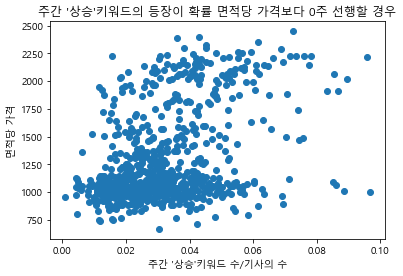

SpearmanrResult(correlation=0.3249933546230857, pvalue=2.6308311922173377e-21)
(0.39416479836555235, 2.1600792414371094e-31)


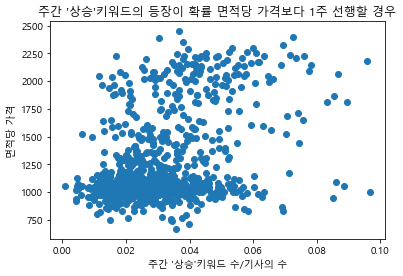

SpearmanrResult(correlation=0.3073631707546639, pvalue=4.2760193419006137e-19)
(0.37939073948919944, 5.422214951110848e-29)


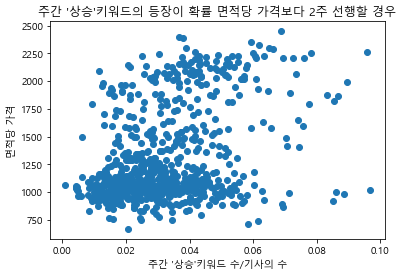

SpearmanrResult(correlation=0.32179523707160973, pvalue=7.518147740286393e-21)
(0.38713114860093945, 3.522391531221676e-30)


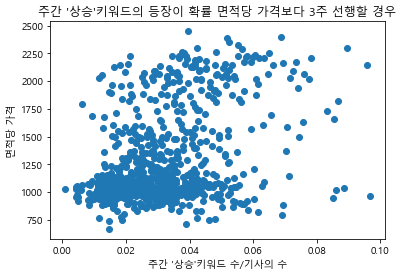

SpearmanrResult(correlation=0.30917486247786946, pvalue=2.8656704330569196e-19)
(0.378322640362864, 9.28905960238206e-29)


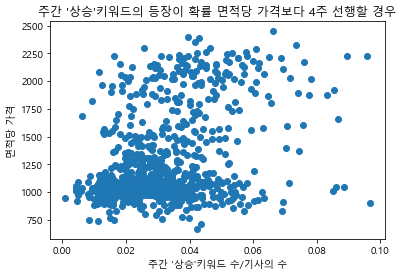

SpearmanrResult(correlation=0.3056115031383416, pvalue=8.035644482030505e-19)
(0.37378865642541165, 4.986047590527286e-28)


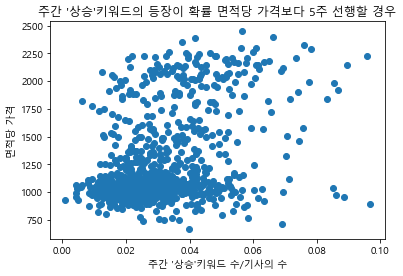

SpearmanrResult(correlation=0.28327721097373565, pvalue=2.8888582890773127e-16)
(0.359928296287386, 6.142332883265092e-26)


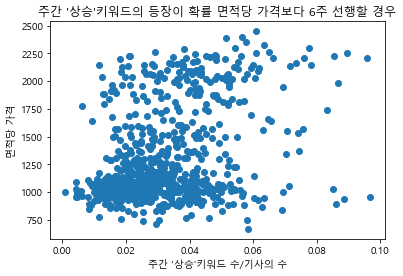

SpearmanrResult(correlation=0.2839762350426088, pvalue=2.5310438604863074e-16)
(0.3675628927209798, 5.0023386947803205e-27)


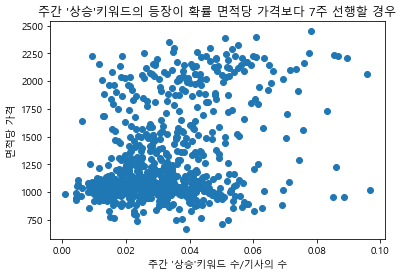

SpearmanrResult(correlation=0.27836938974984066, pvalue=1.0555887598199455e-15)
(0.3553722643626843, 3.1776502739944966e-25)


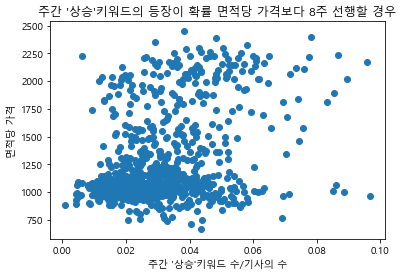

SpearmanrResult(correlation=0.26176191458134357, pvalue=5.518899921576287e-14)
(0.3420488749573403, 2.392324895286644e-23)


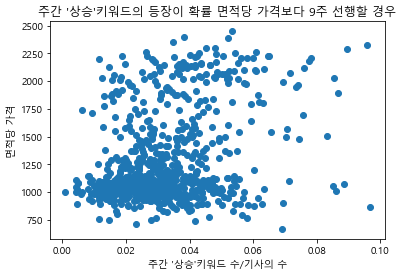

In [102]:
import math

data1 = {}
data1['선행주차'] = []
data1['spearman'] = []
data1['pearson'] = []

for gap in range(10):
    x = [up_word_df.loc['total'][i]/count[i] for i in range(len(up_word_df.loc['total'])-gap)]
    y = [i for i in gu_data[0]['면적당가격'][gap:]]
    plt.scatter(x,y)
    plt.title(f"주간 '상승'키워드의 등장이 확률 면적당 가격보다 {gap}주 선행할 경우")
    plt.xlabel("주간 '상승'키워드 수/기사의 수")
    plt.ylabel("면적당 가격")
    data1['선행주차'].append(gap)
    data1['spearman'].append(scipy.stats.spearmanr(x,y))
    data1['pearson'].append(scipy.stats.pearsonr(x,y))
    print(scipy.stats.spearmanr(x,y))
    print(scipy.stats.pearsonr(x,y))
    plt.show()

SpearmanrResult(correlation=0.34328786164217756, pvalue=9.790918758319744e-24)
(0.4086091844892139, 7.991962677023186e-34)


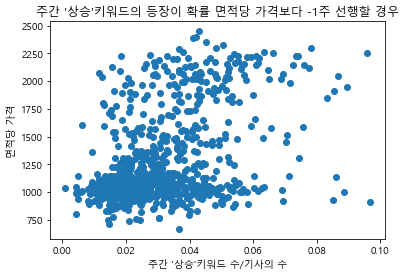

SpearmanrResult(correlation=0.34244002631514253, pvalue=1.3626742934962355e-23)
(0.4090073696819224, 7.480427711747463e-34)


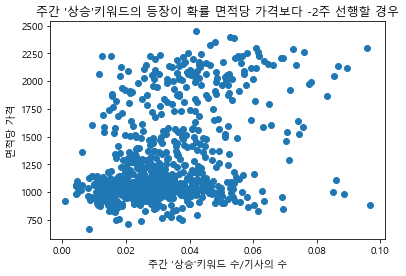

SpearmanrResult(correlation=0.33894836426767316, pvalue=4.319525148092992e-23)
(0.4006156817063566, 2.186363255816787e-32)


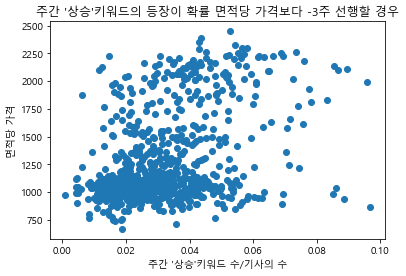

SpearmanrResult(correlation=0.3506050913751884, pvalue=1.1456947102393444e-24)
(0.4153693420432447, 7.031197280898894e-35)


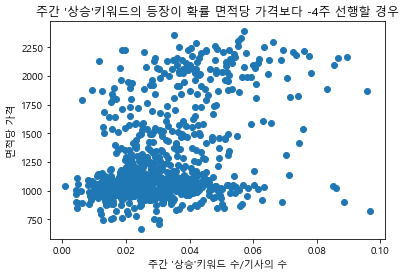

SpearmanrResult(correlation=0.34158225860003766, pvalue=2.1531900863434064e-23)
(0.40854844648482797, 1.1825449891074547e-33)


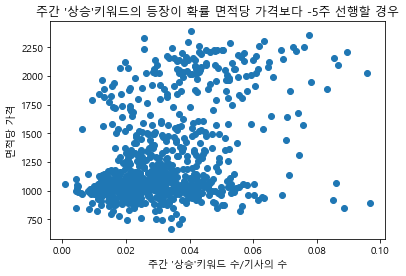

SpearmanrResult(correlation=0.33206234648225974, pvalue=4.255653520602685e-22)
(0.4040833543272139, 7.454513992167141e-33)


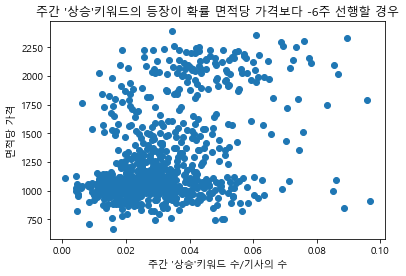

SpearmanrResult(correlation=0.3476890201927148, pvalue=3.558047577572177e-24)
(0.4063828064201459, 3.3273562011514853e-33)


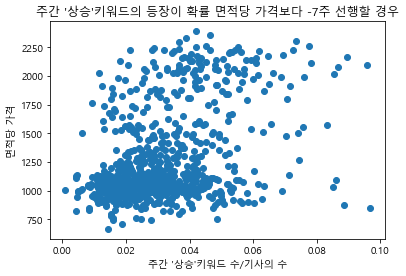

SpearmanrResult(correlation=0.3387959340816195, pvalue=6.161465789070888e-23)
(0.40955898348460734, 1.045881415191587e-33)


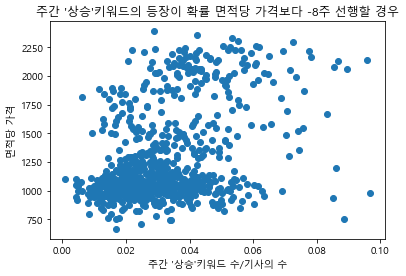

SpearmanrResult(correlation=0.321290323999774, pvalue=1.2119127558558691e-20)
(0.40505949603099156, 6.681553802254046e-33)


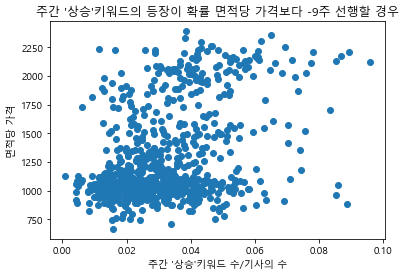

In [103]:
import math

data2 = {}
data2['선행주차'] = []
data2['spearman'] = []
data2['pearson'] = []

for gap in range(1,10):
    x = [up_word_df.loc['total'][i]/count[i] for i in range(gap,len(up_word_df.loc['total']))]
    y = [i for i in gu_data[0]['면적당가격'][:-gap]]
    plt.scatter(x,y)
    plt.title(f"주간 '상승'키워드의 등장이 확률 면적당 가격보다 {gap*(-1)}주 선행할 경우")
    plt.xlabel("주간 '상승'키워드 수/기사의 수")
    plt.ylabel("면적당 가격")
    data2['선행주차'].append(gap*(-1))
    print(scipy.stats.spearmanr(x,y))
    data2['spearman'].append(scipy.stats.spearmanr(x,y))
    print(scipy.stats.pearsonr(x,y))
    data2['pearson'].append(scipy.stats.pearsonr(x,y))
    plt.show()

In [104]:
data1_df = pd.DataFrame(data1)
data2_df = pd.DataFrame(data2)
data_df = pd.concat([data1_df,data2_df], ignore_index = False)
data_df = data_df.sort_values(by =['선행주차'])
data_df

,선행주차,spearman,pearson
8,-9,"(0.321290323999774, 1.2119127558558691e-20)","(0.40505949603099156, 6.681553802254046e-33)"
7,-8,"(0.3387959340816195, 6.161465789070888e-23)","(0.40955898348460734, 1.045881415191587e-33)"
6,-7,"(0.3476890201927148, 3.558047577572177e-24)","(0.4063828064201459, 3.3273562011514853e-33)"
5,-6,"(0.33206234648225974, 4.255653520602685e-22)","(0.4040833543272139, 7.454513992167141e-33)"
4,-5,"(0.34158225860003766, 2.1531900863434064e-23)","(0.40854844648482797, 1.1825449891074547e-33)"
3,-4,"(0.3506050913751884, 1.1456947102393444e-24)","(0.4153693420432447, 7.031197280898894e-35)"
2,-3,"(0.33894836426767316, 4.319525148092992e-23)","(0.4006156817063566, 2.186363255816787e-32)"
1,-2,"(0.34244002631514253, 1.3626742934962355e-23)","(0.4090073696819224, 7.480427711747463e-34)"
0,-1,"(0.34328786164217756, 9.790918758319744e-24)","(0.4086091844892139, 7.991962677023186e-34)"
0,0,"(0.3442514492976788, 6.77090325173824e-24)","(0.41416397741013267, 7.835592200439513e-35)"


C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


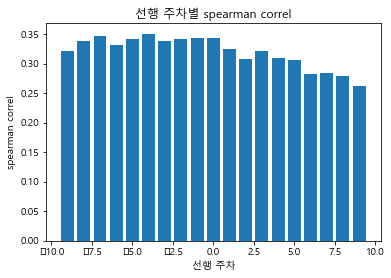

In [105]:
plt.bar(data_df['선행주차'],[i[0] for i in data_df['spearman']])
plt.title('선행 주차별 spearman correl')
plt.xlabel('선행 주차')
plt.ylabel('spearman correl')
plt.show()

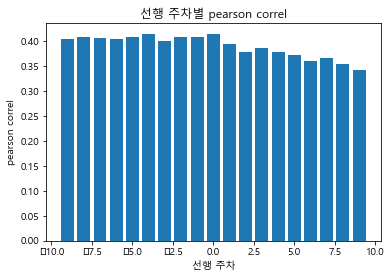

In [106]:
plt.bar(data_df['선행주차'],[i[0] for i in data_df['pearson']])
plt.title('선행 주차별 pearson correl')
plt.xlabel('선행 주차')
plt.ylabel('pearson correl')
plt.show()

SpearmanrResult(correlation=-0.19403582394680013, pvalue=2.698978913638325e-08)
(-0.0649990924890534, 0.06478858087680932)


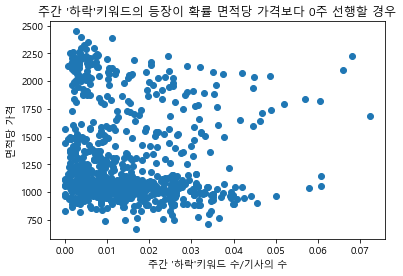

SpearmanrResult(correlation=-0.17141331218156683, pvalue=9.6711012693685e-07)
(-0.04864779969820672, 0.16738669686259547)


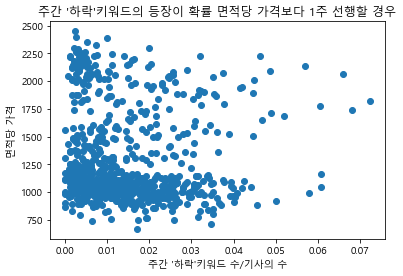

SpearmanrResult(correlation=-0.1453522810751405, pvalue=3.440140765916923e-05)
(-0.03701379320276241, 0.29392250727611785)


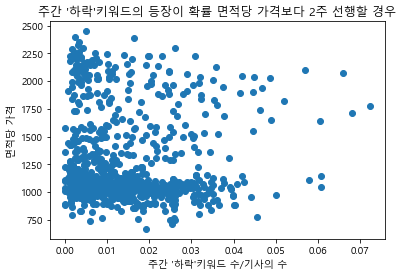

SpearmanrResult(correlation=-0.14109533237828814, pvalue=5.891315093823971e-05)
(-0.024607328885210354, 0.48568223461812937)


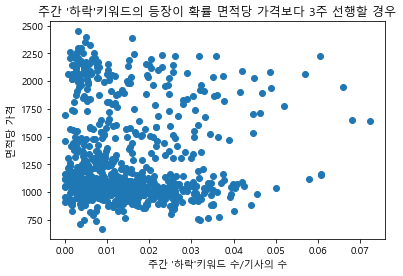

SpearmanrResult(correlation=-0.15086481206021107, pvalue=1.741352324463134e-05)
(-0.02534207197465229, 0.47302306590903553)


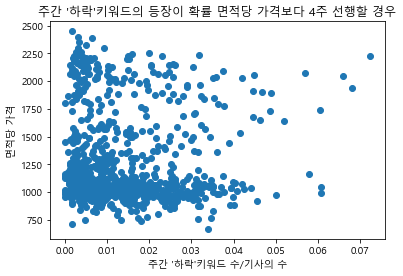

SpearmanrResult(correlation=-0.13834662218082433, pvalue=8.382780874052998e-05)
(-0.017912896381958428, 0.612258498311756)


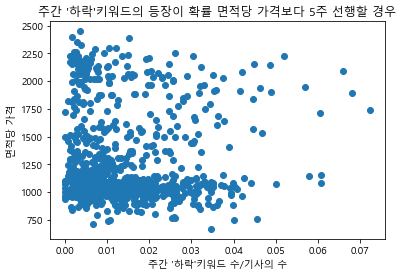

SpearmanrResult(correlation=-0.12637541935507537, pvalue=0.0003335909084827529)
(-0.01260771587533786, 0.7214640521094233)


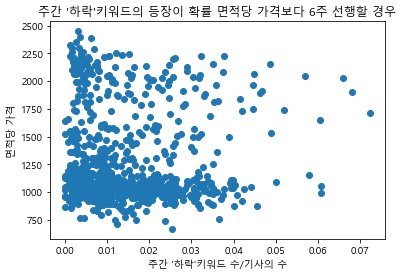

SpearmanrResult(correlation=-0.1256814247562217, pvalue=0.00036299558123976516)
(-0.008409837624589252, 0.8121546998433287)


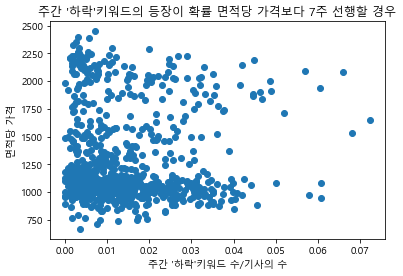

SpearmanrResult(correlation=-0.11700663865823892, pvalue=0.0009142438878500134)
(0.003980442350611017, 0.9104996607444831)


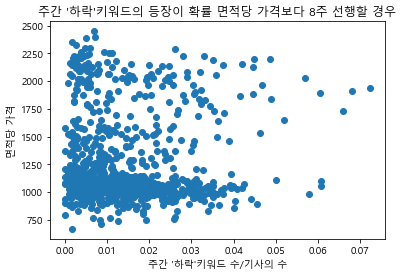

SpearmanrResult(correlation=-0.09955752632679588, pvalue=0.004851279945469085)
(0.028478873917797284, 0.42145279038394323)


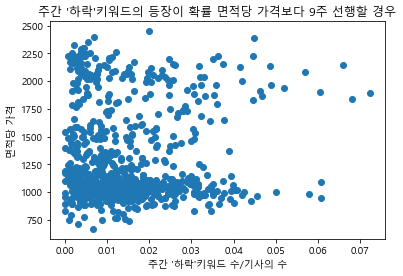

In [107]:
import math

data3 = {}
data3['선행주차'] = []
data3['spearman'] = []
data3['pearson'] = []

for gap in range(10):
    x = [down_word_df.loc['total'][i]/count[i] for i in range(len(down_word_df.loc['total'])-gap)]
    y = [i for i in gu_data[0]['면적당가격'][gap:]]
    plt.scatter(x,y)
    plt.title(f"주간 '하락'키워드의 등장이 확률 면적당 가격보다 {gap}주 선행할 경우")
    plt.xlabel("주간 '하락'키워드 수/기사의 수")
    plt.ylabel("면적당 가격")
    data3['선행주차'].append(gap)
    print(scipy.stats.spearmanr(x,y))
    data3['spearman'].append(scipy.stats.spearmanr(x,y))
    print(scipy.stats.pearsonr(x,y))
    data3['pearson'].append(scipy.stats.pearsonr(x,y))
    plt.show()

SpearmanrResult(correlation=-0.17839916125063926, pvalue=3.3779803931726307e-07)
(-0.06695478118461509, 0.05727321485397251)


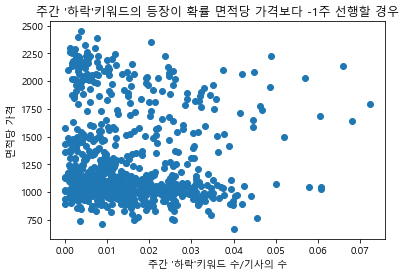

SpearmanrResult(correlation=-0.1958665216842646, pvalue=2.0653211355391944e-08)
(-0.07124072166954176, 0.043180005101472456)


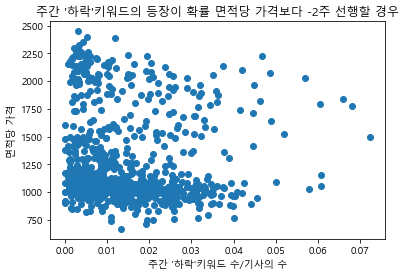

SpearmanrResult(correlation=-0.1666308904164575, pvalue=1.9976268143447685e-06)
(-0.0645460802315698, 0.06719039814913647)


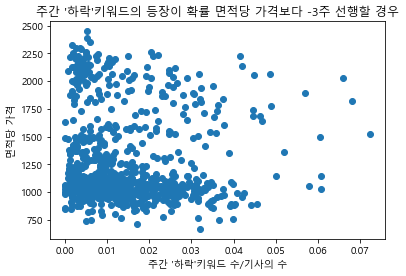

SpearmanrResult(correlation=-0.1707743366875582, pvalue=1.112732997775761e-06)
(-0.05932356115704572, 0.09276741917126086)


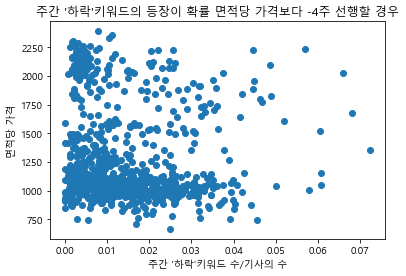

SpearmanrResult(correlation=-0.17054740934351903, pvalue=1.168106176152568e-06)
(-0.06487464873709362, 0.06614473520900242)


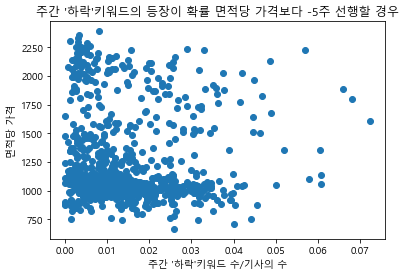

SpearmanrResult(correlation=-0.159183534724362, pvalue=5.901224208304922e-06)
(-0.06037897835168794, 0.08748781058413037)


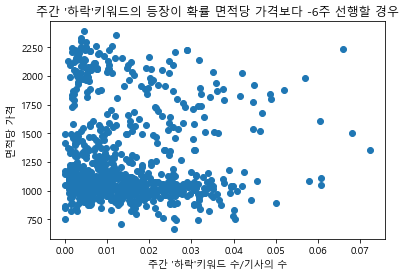

SpearmanrResult(correlation=-0.16219790956364752, pvalue=3.951206410456224e-06)
(-0.055858251388377245, 0.11418436734488267)


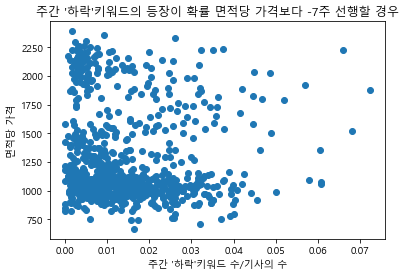

SpearmanrResult(correlation=-0.16093786246722902, pvalue=4.7679991985687485e-06)
(-0.05630417748376852, 0.11154320469264747)


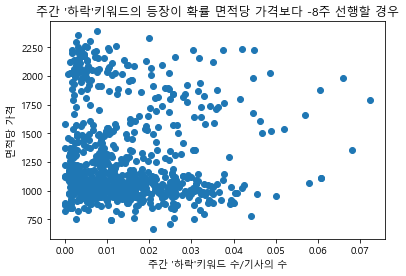

SpearmanrResult(correlation=-0.15838494878080928, pvalue=6.846138640170938e-06)
(-0.06429001661082019, 0.06932534830253155)


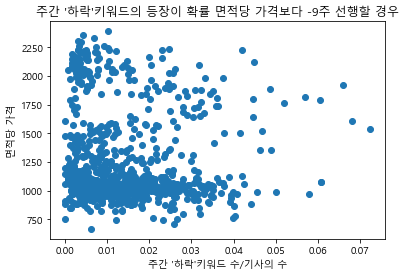

In [108]:
import math

data4 = {}
data4['선행주차'] = []
data4['spearman'] = []
data4['pearson'] = []

for gap in range(1,10):
    x = [down_word_df.loc['total'][i]/count[i] for i in range(gap,len(down_word_df.loc['total']))]
    y = [i for i in gu_data[0]['면적당가격'][:-gap]]
    plt.scatter(x,y)
    plt.title(f"주간 '하락'키워드의 등장이 확률 면적당 가격보다 {gap*(-1)}주 선행할 경우")
    plt.xlabel("주간 '하락'키워드 수/기사의 수")
    plt.ylabel("면적당 가격")
    data4['선행주차'].append(gap*(-1))
    print(scipy.stats.spearmanr(x,y))
    data4['spearman'].append(scipy.stats.spearmanr(x,y))
    print(scipy.stats.pearsonr(x,y))
    data4['pearson'].append(scipy.stats.pearsonr(x,y))
    plt.show()

In [109]:
data3_df = pd.DataFrame(data3)
data4_df = pd.DataFrame(data4)
data_df = pd.concat([data3_df,data4_df], ignore_index = False)
data_df = data_df.sort_values(by =['선행주차'])
data_df

,선행주차,spearman,pearson
8,-9,"(-0.15838494878080928, 6.846138640170938e-06)","(-0.06429001661082019, 0.06932534830253155)"
7,-8,"(-0.16093786246722902, 4.7679991985687485e-06)","(-0.05630417748376852, 0.11154320469264747)"
6,-7,"(-0.16219790956364752, 3.951206410456224e-06)","(-0.055858251388377245, 0.11418436734488267)"
5,-6,"(-0.159183534724362, 5.901224208304922e-06)","(-0.06037897835168794, 0.08748781058413037)"
4,-5,"(-0.17054740934351903, 1.168106176152568e-06)","(-0.06487464873709362, 0.06614473520900242)"
3,-4,"(-0.1707743366875582, 1.112732997775761e-06)","(-0.05932356115704572, 0.09276741917126086)"
2,-3,"(-0.1666308904164575, 1.9976268143447685e-06)","(-0.0645460802315698, 0.06719039814913647)"
1,-2,"(-0.1958665216842646, 2.0653211355391944e-08)","(-0.07124072166954176, 0.043180005101472456)"
0,-1,"(-0.17839916125063926, 3.3779803931726307e-07)","(-0.06695478118461509, 0.05727321485397251)"
0,0,"(-0.19403582394680013, 2.698978913638325e-08)","(-0.0649990924890534, 0.06478858087680932)"


C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


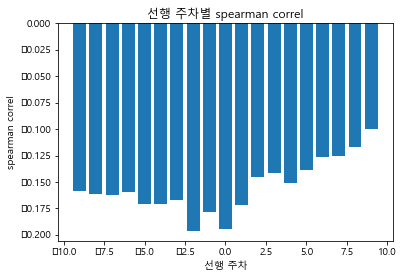

In [110]:
plt.bar(data_df['선행주차'],[i[0] for i in data_df['spearman']])
plt.title('선행 주차별 spearman correl')
plt.xlabel('선행 주차')
plt.ylabel('spearman correl')
plt.show()

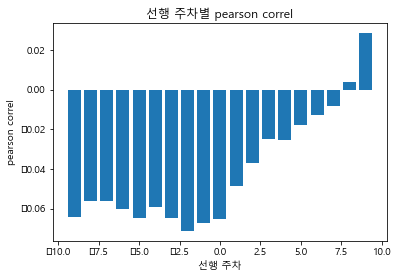

In [111]:
#p-value 높음
plt.bar(data_df['선행주차'],[i[0] for i in data_df['pearson']])
plt.title('선행 주차별 pearson correl')
plt.xlabel('선행 주차')
plt.ylabel('pearson correl')
plt.show()

In [112]:
case_index_df = pd.read_pickle('../seoul_apt_trade_data/case_index_df.pkl')
case_index_df
varivation = list(case_index_df.loc[:,'uprate'])
_avg = list(case_index_df.loc[:,'uprate_avg'])

In [113]:
case_index_df

,case1,case2,case3,case4,case5,case6,case7,case8,uprate,uprate_avg
강남구,"[6, 7, 34, 36, 39, 46, 47, 66, 85, 95, 96, 101...","[5, 14, 22, 26, 35, 37, 38, 42, 55, 64, 65, 72...","[2, 8, 10, 15, 18, 20, 23, 27, 30, 32, 40, 43,...","[12, 24, 44, 49, 53, 70, 76, 90, 103, 113, 124...","[1, 4, 9, 13, 17, 19, 21, 25, 29, 31, 33, 41, ...","[3, 11, 16, 28, 50, 59, 62, 79, 106, 118, 135,...","[1, 4, 5, 6, 7, 9, 13, 14, 17, 19, 21, 22, 25,...","[0, 2, 3, 8, 10, 11, 12, 15, 16, 18, 20, 23, 2...","[-0.1317061309257776, 0.0755196433630375, -0.0...",0.000940
강동구,"[7, 27, 30, 34, 36, 40, 46, 65, 68, 73, 74, 83...","[6, 8, 33, 35, 37, 79, 86, 101, 103, 107, 112,...","[4, 9, 13, 15, 20, 23, 28, 31, 38, 41, 47, 55,...","[1, 10, 16, 21, 24, 44, 76, 98, 99, 122, 142, ...","[3, 5, 12, 14, 19, 22, 26, 29, 32, 39, 45, 54,...","[2, 11, 17, 18, 25, 42, 43, 48, 49, 50, 51, 52...","[3, 5, 6, 7, 8, 12, 14, 19, 22, 26, 27, 29, 30...","[0, 1, 2, 4, 9, 10, 11, 13, 15, 16, 17, 18, 20...","[-0.08053120090945218, -0.0677587035592929, -0...",0.000967
강서구,"[10, 25, 28, 36, 114, 115, 116, 119, 121, 147,...","[7, 22, 35, 40, 41, 42, 55, 70, 74, 87, 96, 11...","[2, 4, 8, 11, 15, 19, 23, 26, 29, 32, 37, 43, ...","[5, 12, 17, 20, 48, 52, 59, 63, 72, 90, 110, 1...","[1, 3, 6, 9, 14, 18, 21, 24, 27, 31, 34, 39, 4...","[13, 16, 30, 33, 38, 51, 53, 60, 68, 89, 91, 9...","[1, 3, 6, 7, 9, 10, 14, 18, 21, 22, 24, 25, 27...","[0, 2, 4, 5, 8, 11, 12, 13, 15, 16, 17, 19, 20...","[-0.010000817878349852, 0.01732253050087575, -...",0.001657
강북구,"[28, 35, 43, 46, 49, 58, 117, 118, 121, 134, 1...","[23, 36, 55, 84, 87, 110, 111, 150, 159, 170, ...","[2, 6, 9, 13, 16, 19, 21, 24, 26, 29, 31, 33, ...","[3, 11, 14, 17, 53, 74, 96, 99, 127, 137, 138,...","[1, 5, 8, 12, 15, 18, 20, 22, 25, 27, 30, 32, ...","[4, 7, 10, 60, 69, 79, 82, 89, 100, 103, 108, ...","[1, 5, 8, 12, 15, 18, 20, 22, 23, 25, 27, 28, ...","[0, 2, 3, 4, 6, 7, 9, 10, 11, 13, 14, 16, 17, ...","[-0.07770145846522913, 0.20140240074962582, -0...",0.001778
관악구,"[4, 8, 9, 30, 37, 48, 51, 74, 84, 86, 90, 99, ...","[7, 29, 41, 60, 81, 85, 87, 95, 96, 100, 105, ...","[2, 5, 10, 13, 15, 21, 24, 26, 31, 33, 38, 42,...","[16, 19, 22, 34, 44, 63, 79, 115, 123, 126, 14...","[1, 3, 6, 12, 14, 20, 23, 25, 28, 32, 36, 40, ...","[11, 17, 18, 27, 35, 39, 43, 62, 68, 76, 107, ...","[1, 3, 4, 6, 7, 8, 9, 12, 14, 20, 23, 25, 28, ...","[0, 2, 5, 10, 11, 13, 15, 16, 17, 18, 19, 21, ...","[-0.0919116003001974, 0.034083617785010206, -0...",0.001401
광진구,"[3, 8, 28, 38, 65, 66, 71, 74, 102, 147, 182, ...","[2, 15, 37, 47, 60, 87, 97, 110, 116, 136, 139...","[4, 6, 9, 11, 16, 18, 20, 23, 26, 29, 31, 33, ...","[12, 24, 49, 53, 80, 91, 107, 108, 126, 129, 1...","[1, 5, 7, 10, 14, 17, 19, 22, 25, 27, 30, 32, ...","[13, 21, 50, 56, 85, 106, 114, 134, 143, 153, ...","[1, 2, 3, 5, 7, 8, 10, 14, 15, 17, 19, 22, 25,...","[0, 4, 6, 9, 11, 12, 13, 16, 18, 20, 21, 23, 2...","[-0.0733592452022878, 0.06075941983879273, 0.0...",0.001197
구로구,"[24, 56, 57, 59, 66, 74, 84, 87, 110, 117, 118...","[4, 10, 38, 45, 58, 67, 71, 99, 100, 114, 123,...","[2, 5, 7, 11, 13, 17, 22, 25, 27, 29, 31, 36, ...","[8, 33, 77, 82, 106, 112, 132, 142, 151, 187, ...","[1, 3, 6, 9, 12, 16, 21, 23, 26, 28, 30, 35, 3...","[14, 15, 18, 19, 20, 32, 34, 42, 43, 61, 64, 6...","[1, 3, 4, 6, 9, 10, 12, 16, 21, 23, 24, 26, 28...","[0, 2, 5, 7, 8, 11, 13, 14, 15, 17, 18, 19, 20...","[-0.0774455958603197, 0.06116043226670311, -0....",0.001159
금천구,"[16, 36, 38, 47, 87, 98, 99, 101, 107, 112, 12...","[7, 10, 23, 30, 37, 39, 51, 63, 64, 65, 79, 82...","[2, 8, 11, 13, 17, 19, 24, 26, 28, 31, 33, 40,...","[4, 34, 41, 45, 49, 55, 95, 96, 139, 140, 145,...","[1, 6, 9, 12, 15, 18, 22, 25, 27, 29, 32, 35, ...","[3, 5, 14, 20, 21, 42, 56, 59, 69, 72, 77, 105...","[1, 6, 7, 9, 10, 12, 15, 16, 18, 22, 23, 25, 2...","[0, 2, 3, 4, 5, 8, 11, 13, 14, 17, 19, 20, 21,...","[-0.024772337653797938, 0.052399700122267114, ...",0.001708
노원구,"[5, 21, 31, 38, 48, 49, 51, 55, 60, 61, 64, 10...","[4, 17, 22, 26, 29, 30, 37, 

In [114]:
for i in range(len(varivation)):
    varivation[0][i] = varivation[0][i]-_avg[0]

In [115]:
varivation = varivation[0]

C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


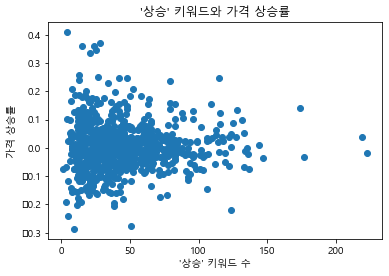

SpearmanrResult(correlation=0.02395329560818968, pvalue=0.49681992252236473)
(0.014360094333187733, 0.6837681421091689)


In [116]:
plt.scatter(up_word_df.loc['total',1:],varivation)
plt.title("'상승' 키워드와 가격 상승률")
plt.xlabel("'상승' 키워드 수")
plt.ylabel("가격 상승률")
plt.show()
print(scipy.stats.spearmanr(up_word_df.loc['total',1:],varivation))
print(scipy.stats.pearsonr(up_word_df.loc['total',1:],varivation))

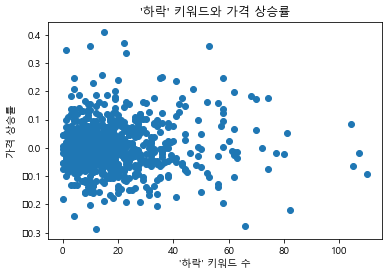

SpearmanrResult(correlation=-0.0031983253330875048, pvalue=0.927717771803277)
(0.016207050029455244, 0.6457155662001439)


In [117]:
plt.scatter(down_word_df.loc['total',1:],varivation)
plt.title("'하락' 키워드와 가격 상승률")
plt.xlabel("'하락' 키워드 수")
plt.ylabel("가격 상승률")
plt.show()
print(scipy.stats.spearmanr(down_word_df.loc['total',1:],varivation))
print(scipy.stats.pearsonr(down_word_df.loc['total',1:],varivation))

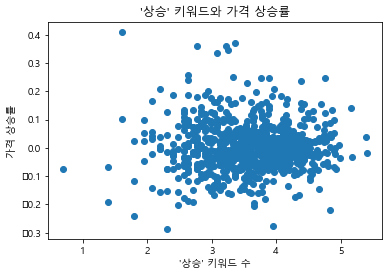

SpearmanrResult(correlation=0.02395329560818968, pvalue=0.49681992252236473)
(0.012583296222022975, 0.721149360709186)


In [118]:
import math

plt.scatter([math.log(i+1) for i in up_word_df.loc['total',1:]],varivation)
plt.title("'상승' 키워드와 가격 상승률")
plt.xlabel("'상승' 키워드 수")
plt.ylabel("가격 상승률")
plt.show()
print(scipy.stats.spearmanr([math.log(i+1) for i in up_word_df.loc['total',1:]],varivation))
print(scipy.stats.pearsonr([math.log(i+1) for i in up_word_df.loc['total',1:]],varivation))

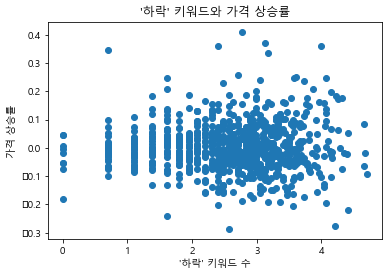

SpearmanrResult(correlation=-0.0031983253330875048, pvalue=0.927717771803277)
(0.02025683891873726, 0.565549605178344)


In [119]:
import math

plt.scatter([math.log(i+1) for i in down_word_df.loc['total',1:]],varivation)
plt.title("'하락' 키워드와 가격 상승률")
plt.xlabel("'하락' 키워드 수")
plt.ylabel("가격 상승률")
plt.show()
print(scipy.stats.spearmanr([math.log(i+1) for i in down_word_df.loc['total',1:]],varivation))
print(scipy.stats.pearsonr([math.log(i+1) for i in down_word_df.loc['total',1:]],varivation))

Text(0, 0.5, '단어 수')

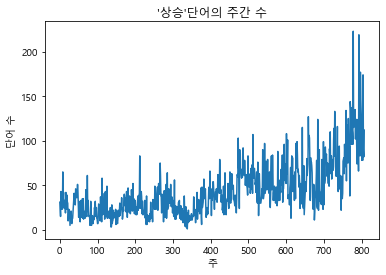

In [120]:
plt.plot(up_word_df.loc['total'])
plt.title("'상승'단어의 주간 수")
plt.xlabel("주")
plt.ylabel("단어 수")

Text(0, 0.5, '단어 수')

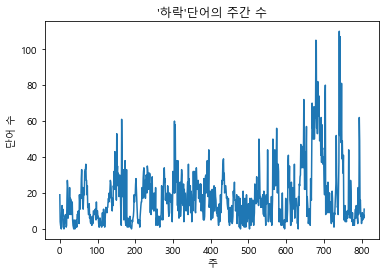

In [121]:
plt.plot(down_word_df.loc['total'])
plt.title("'하락'단어의 주간 수")
plt.xlabel("주")
plt.ylabel("단어 수")

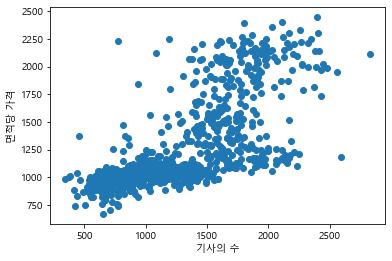

SpearmanrResult(correlation=0.7518555251080496, pvalue=5.8594729733781365e-148)
(0.6883450881280626, 1.6893522876415824e-114)


In [122]:
plt.scatter(count,gu_data[0]['면적당가격'])
plt.xlabel("기사의 수")
plt.ylabel("면적당 가격")
plt.show()
print(scipy.stats.spearmanr(count,gu_data[0]['면적당가격']))
print(scipy.stats.pearsonr(count,gu_data[0]['면적당가격']))

Text(0, 0.5, '기사의 수')

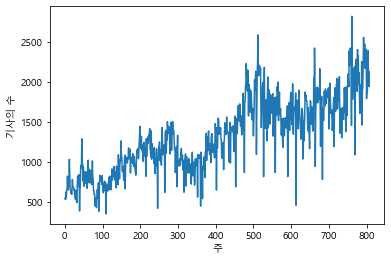

In [123]:
plt.plot(count)
plt.xlabel("주")
plt.ylabel("기사의 수")

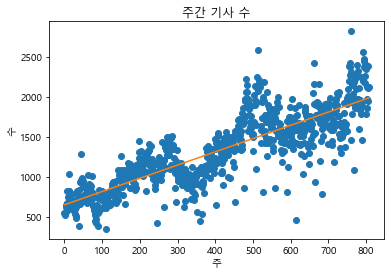

In [124]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = pd.Series([i for i in range(len(count))])
y = pd.Series(count)

line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

plt.plot(x, y, 'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.title("주간 기사 수")
plt.xlabel("주")
plt.ylabel("수")
plt.show()

In [125]:
slope = line_fitter.coef_[0]
intercept = line_fitter.intercept_

print(f"function: {intercept} + {slope}*i")

function: 648.3136251820483 + 1.6618621432910823*i


In [126]:
def flat_func(i):
    return slope*i + intercept

In [127]:
flatten_weekly = pd.DataFrame({'data' : [count[i] - flat_func(i) for i in range(len(count))]})

C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


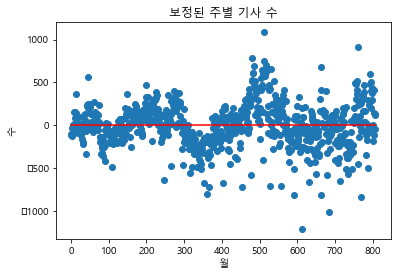

In [128]:
x1 = pd.Series([i for i in range(len(count))])
y1 = flatten_weekly['data']
plt.plot(x1, y1, 'o')

x2 = [i for i in range(len(count))]
y2 = [0 for i in range(len(count))]
plt.plot(x2, y2, color = 'r')
plt.title("보정된 주별 기사 수")
plt.xlabel("월")
plt.ylabel("수")
plt.show()

In [129]:
linear_data = pd.DataFrame({'data' : [(1+(count[i]-flat_func(i))/flat_func(i))*100 for i in range(len(count))]})

[]

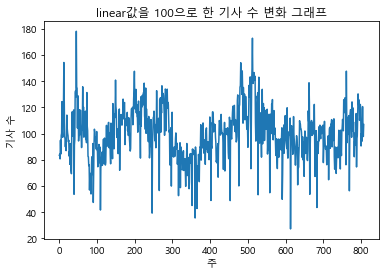

In [130]:
plt.plot(linear_data)
plt.title("linear값을 100으로 한 기사 수 변화 그래프")
plt.xlabel("주")
plt.ylabel("기사 수")
plt.plot()

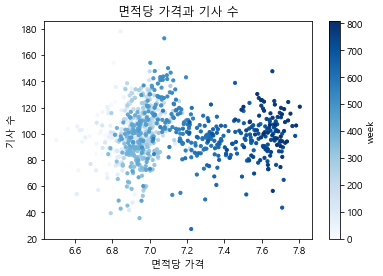

SpearmanrResult(correlation=0.10284175126699743, pvalue=0.0034274542867564735)
(0.016344151768414313, 0.6427195170057974)


In [131]:
color = np.arange(0, 808, 1)
plt.scatter([math.log(i) for i in gu_data[0]['면적당가격']],linear_data['data'], s=10, c=color, cmap = plt.cm.Blues)
plt.colorbar(label='week')
plt.title("면적당 가격과 기사 수")
plt.xlabel("면적당 가격")
plt.ylabel("기사 수")
plt.show()
print(scipy.stats.spearmanr([math.log(i) for i in gu_data[0]['면적당가격']],linear_data['data']))
print(scipy.stats.pearsonr([math.log(i) for i in gu_data[0]['면적당가격']],linear_data['data']))

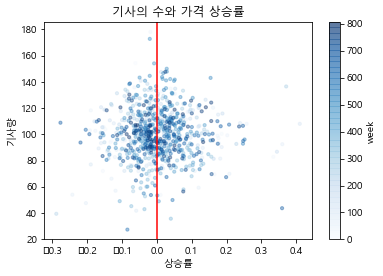

SpearmanrResult(correlation=0.02242813044022677, pvalue=0.5246297416388714)
(0.0226395568879629, 0.5207276327383555)


In [166]:
color = np.arange(0, 807, 1)
plt.scatter(varivation,linear_data['data'][1:], s=10, c=color, cmap = plt.cm.Blues, alpha = 0.4)
plt.colorbar(label='week')
plt.title("기사의 수와 가격 상승률")
plt.xlabel("상승률")
plt.ylabel("기사량")
plt.axvline(x = _avg[0], c = 'r')
plt.show()
print(scipy.stats.spearmanr(varivation,linear_data['data'][1:]))
print(scipy.stats.pearsonr(varivation,linear_data['data'][1:]))